# Import Libraries

## Install Packages

In [7]:
!pip install matplotlib
!pip install scikit-learn
!pip install datetime
!pip install utils
!pip install tensorflow
!pip install keras
!pip install keras-tuner
!pip install pandas
!pip install numpy
!pip install datetime
!pip install scikit-learn
!pip install yfinance


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip



In [8]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from time import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


import yfinance as yf
import itertools

# Technical Indicators Analysis

Its important to conduct the normal machine learning process of data handling, cleaning, and wrangling of our basic Yahoo! Finance dataset in order to calculate the technical indicators as well as manipulating the dataframe to fit into an LSTM.

We will first start by using the yf library to gather the historical stock data of Google (Alphabet)

In [43]:
Google = yf.Ticker("GOOG")
Google = Google.history(period = "max")

Visualize the sparkline chart.

<Axes: xlabel='Date'>

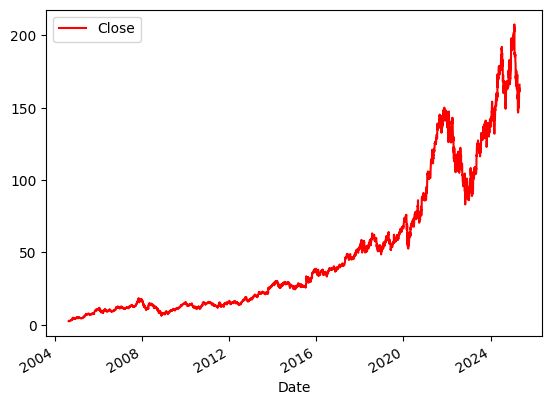

In [44]:
Google.plot.line(y="Close", use_index=True, color="Red")

Let's get familiar with the yf dataframe structure

In [45]:
Google

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.478923,2.579567,2.378775,2.487352,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.503960,2.704009,2.491318,2.684922,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.745407,2.813082,2.703266,2.711942,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.757554,2.766478,2.567421,2.599647,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.601877,2.677237,2.575105,2.627658,184645512,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-28 00:00:00-04:00,164.259995,164.949997,160.380005,162.419998,20871200,0.0,0.0
2025-04-29 00:00:00-04:00,162.044998,162.679993,159.389999,162.059998,15955200,0.0,0.0
2025-04-30 00:00:00-04:00,159.860001,161.373993,157.154999,160.889999,20639500,0.0,0.0


To calculate technical indicators we will only need the "Open" "High" "Low" "Close" and "Volume" columns. Drop the other columns.

In [46]:
del Google["Dividends"]
del Google["Stock Splits"]

## Technical Indicators Functions
    

In [47]:
def calculate_MA20(df, window=20):
    df['MA20'] = df['Close'].rolling(window=window).mean()
    df['MA20_Normalized'] = df['Close'] / df['MA20']
    return df

def calculate_EMA20(df, window=20):
    df['EMA20'] = df['Close'].ewm(span=window, adjust=False).mean()
    df['EMA20_Normalized'] = df['Close'] / df['EMA20']
    return df

def calculate_MA7(df, window=7):
    df['MA7'] = df['Close'].rolling(window=window).mean()
    df['MA7_Normalized'] = df['Close'] / df['MA7']
    return df

def calculate_EMA7(df, window=7):
    df['EMA7'] = df['Close'].ewm(span=window, adjust=False).mean()
    df['EMA7_Normalized'] = df['Close'] / df['EMA7']
    return df

In [48]:
def calculate_macd(df, short_window=7, long_window=26, signal_window=9):
    df['EMA_Short'] = df['Close'].ewm(span=short_window, adjust=False).mean()
    df['EMA_Long'] = df['Close'].ewm(span=long_window, adjust=False).mean()
    df['MACD'] = df['EMA_Short'] - df['EMA_Long']
    df['MACD_Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
    df['MACD_Ratio'] = (df['MACD'] - df['MACD_Signal']) / (0.5 * (abs(df['MACD']) + abs(df['MACD_Signal'])))
    return df

def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

def calculate_bollinger_bands(df, window=20, num_std=2):
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['STD'] = df['Close'].rolling(window=window).std()
    df['Upper_BB'] = df['SMA'] + (df['STD'] * num_std)
    df['Lower_BB'] = df['SMA'] - (df['STD'] * num_std)
    df['BB%'] = (df['Close'] - df['Lower_BB']) / (df['Upper_BB'] - df['Lower_BB'])
    return df

def calculate_fibonacci_retracement(df, window=20):
    df['High_N'] = df['High'].rolling(window=window).max()
    df['Low_N'] = df['Low'].rolling(window=window).min()
    df['Fib_Retracement'] = (df['High_N'] - df['Close']) / (df['High_N'] - df['Low_N'])
    return df


## Data Cleaning

In [49]:
Google = calculate_MA7(Google)
Google = calculate_EMA7(Google)
Google = calculate_MA20(Google)
Google = calculate_EMA20(Google)
Google = calculate_macd(Google)
Google = calculate_rsi(Google)
Google = calculate_bollinger_bands(Google)
Google = calculate_fibonacci_retracement(Google)

In [50]:
Google

,Open,High,Low,Close,Volume,MA7,MA7_Normalized,EMA7,EMA7_Normalized,MA20,...,MACD_Ratio,RSI,SMA,STD,Upper_BB,Lower_BB,BB%,High_N,Low_N,Fib_Retracement
Date,,,,,,,,,,,,,,,,,,,,,
2004-08-19 00:00:00-04:00,2.478923,2.579567,2.378775,2.487352,897427216,NaN,NaN,2.487352,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00-04:00,2.503960,2.704009,2.491318,2.684922,458857488,NaN,NaN,2.536744,1.058412,NaN,...,1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23 00:00:00-04:00,2.745407,2.813082,2.703266,2.711942,366857939,NaN,NaN,2.580544,1.050919,NaN,...,1.104947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24 00:00:00-04:00,2.757554,2.766478,2.567421,2.599647,306396159,NaN,NaN,2.585320,1.005542,NaN,...,0.786494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25 00:00:00-04:00,2.601877,2.677237,2.575105,2.627658,184645512,NaN,NaN,2.595904,1.012232,NaN,...,0.609486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28 00:00:00-04:00,164.259995,164.949997,160.380005,162.419998,20871200,157.511429,1.031163,159.528247,1.018127,156.211000,...,1.475013,61.776258,156.211000,5.075047,166.361095,146.060905,0.805859,168.240005,142.660004,0.227522
2025-04-29 00:00:00-04:00,162.044998,162.679993,159.389999,162.059998,15955200,158.754286,1.020823,160.161184,1.011856,156.502500,...,1.959938,64.424143,156.502500,5.240917,166.984334,146.020667,0.765101,168.240005,142.660004,0.241595
2025-04-30 00:00:00-04:00,159.860001,161.373993,157.154999,160.889999,20639500,160.330000,1.003493,160.343388,1.003409,156.603000,...,2.000000,49.789346,156.603000,5.307753,167.218506,145.987494,0.701922,168.240005,142.660004,0.287334


Our functions generate columns that we will not used in the actual training data but are important for debugging. Drop them.

In [51]:
del Google["High_N"]
del Google["Low_N"]
del Google["MA7"]
del Google["EMA7"]
del Google["MA20"]
del Google["EMA20"]
del Google["MACD"]
del Google["MACD_Signal"]
del Google["MACD_Ratio"]
del Google["Upper_BB"]
del Google["Lower_BB"]
del Google["EMA_Short"]
del Google["EMA_Long"]
del Google["STD"]
del Google["SMA"]


In [52]:
Google.shape

(5210, 12)

After keeping all the normalized columns from our technical indicators functions, we can now drop the rows with NaN values.

In [53]:
Google = Google.dropna()
Google.shape

(5191, 12)

Even after data cleaning, we still have 5138 rows of data and 12 features. This is still a large amount of data to train on. We will now reduce the amount of data by using the "Date" column to only keep the data from 2020 to 2024. This is important beause stock market behavior from 2000-2010 could be drastically different which could skew the results of our model.


In [54]:
Google.index = pd.to_datetime(Google.index)

Google = Google[Google.index >= '2021-09-29']
Google = Google[Google.index <= '2022-09-30']
print(Google.shape)
Google

(254, 12)


,Open,High,Low,Close,Volume,MA7_Normalized,EMA7_Normalized,MA20_Normalized,EMA20_Normalized,RSI,BB%,Fib_Retracement
Date,,,,,,,,,,,,
2021-09-29 00:00:00-04:00,136.463337,136.750778,133.617122,133.886841,26338000,0.963568,0.968433,0.945249,0.955353,28.627145,-0.131207,0.978442
2021-09-30 00:00:00-04:00,133.691767,134.950803,132.373017,132.637268,35294000,0.960848,0.969234,0.940583,0.951290,30.829770,-0.089177,0.980075
2021-10-01 00:00:00-04:00,132.924918,136.424835,132.748750,135.819199,28388000,0.988456,0.994354,0.965791,0.976518,35.549024,0.173505,0.734042
2021-10-04 00:00:00-04:00,135.059774,135.060275,130.548154,133.134399,31530000,0.977067,0.980902,0.950403,0.961132,32.057846,0.059948,0.825047
2021-10-05 00:00:00-04:00,133.368310,136.714461,133.368310,135.535049,24126000,1.001432,0.998942,0.970762,0.980474,33.571137,0.238686,0.662649
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26 00:00:00-04:00,98.145146,99.966521,97.916227,98.344200,22437900,0.977114,0.976880,0.931024,0.935144,30.516839,0.085085,0.945318
2022-09-27 00:00:00-04:00,99.439014,99.986417,96.881122,97.627586,24225000,0.977646,0.977148,0.929604,0.934710,18.978454,0.099793,0.950980
2022-09-28 00:00:00-04:00,97.557920,100.921991,97.338963,100.265099,24617000,1.008524,1.002658,0.958885,0.963637,29.870134,0.267084,0.777778


## Building the LSTM Model

In [55]:
class LSTMModel:
    def __init__(self, df, learning_rate, seq_length, prediction_days=1):
        self.prediction_days = prediction_days
        self.df = df
        self.seq_length = seq_length
        self.learning_rate = learning_rate
        
        # these features will be used to train the model
        self.features = ['Close', 'Volume', 
                        'MA7_Normalized', 'EMA7_Normalized', 
                        'MA20_Normalized', 'EMA20_Normalized',
                        'RSI', 'BB%', 'Fib_Retracement']
        self.data = df[self.features].values
        
        # some features are on different value scales so we must normalize them to values [0,1]
        self.scaler = MinMaxScaler()
        self.data_scaled = self.scaler.fit_transform(self.data)
        
        self.close_scaler = MinMaxScaler()
        self.close_scaler.fit_transform(df[['Close']].values)
        
        # our train/test split will be 80/20
        self.train_size = int(0.8 * len(self.data_scaled))
        self.train_data = self.data_scaled[:self.train_size]
        self.test_data = self.data_scaled[self.train_size:]
        
        # now we need our X_train and Y_train and X_Test and Y_test sets using the create_sequences function
        self.X_train, self.y_train = self.create_sequences(self.train_data)
        self.X_test, self.y_test = self.create_sequences(self.test_data)
        
        # Build and compile model
        self.model = self.build_model()


    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length - self.prediction_days + 1):
            X.append(data[i:(i + self.seq_length)]) # X is going to be the input sequences (past data)
            y.append(data[i + self.seq_length:i + self.seq_length + self.prediction_days, 0]) # y is going to be the target sequences (future data to predict)
        return np.array(X), np.array(y)
    
    # simple LSTM model for handling time-series data
    def build_model(self):
        model = Sequential([
            LSTM(128, input_shape=(self.seq_length, len(self.features)), return_sequences=True),
            Dropout(0.2),
            LSTM(64, return_sequences=False),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(self.prediction_days)
        ])
        
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mse', metrics=['mae'])
        return model

In [56]:
class FitModel:
    def __init__(self, df, seq_length, prediction_days, learning_rate):
        self.df = df
        self.seq_length = seq_length
        self.prediction_days = prediction_days
        self.lstm_model = LSTMModel(df,  learning_rate=learning_rate, seq_length=seq_length, prediction_days=prediction_days)
    
    def fit(self, epochs, batch_size, validation_split=0.1):
        
        history = self.lstm_model.model.fit(
            self.lstm_model.X_train, 
            self.lstm_model.y_train,
            epochs=epochs, 
            batch_size=batch_size,
            validation_split=validation_split,
            shuffle=False
        )
        return history
    
    def predict(self):
        train_predict = self.lstm_model.model.predict(self.lstm_model.X_train)
        test_predict = self.lstm_model.model.predict(self.lstm_model.X_test)
        
        # AI Disclosure - These two variables were created with the help of ChatGPT. I kept getting shape or dimension errors and this helped fix 
        # those problems.
        train_predict = self.lstm_model.close_scaler.inverse_transform(
            np.hstack([train_predict, np.zeros((len(train_predict), len(self.lstm_model.features)-1))])
        )[:, 0]
        test_predict = self.lstm_model.close_scaler.inverse_transform(
            np.hstack([test_predict, np.zeros((len(test_predict), len(self.lstm_model.features)-1))])
        )[:, 0]
        
        return train_predict, test_predict
    
    def plot_results(self, train_predict, test_predict):
        results_df = self.df[['Close']].copy()
        results_df.loc[:,'Predicted'] = np.nan # initialize the predicted price to NA
        
        train_index = self.df.index[self.seq_length:self.lstm_model.train_size]
        test_index = self.df.index[self.lstm_model.train_size+self.seq_length:]
        
        # in time series data from YFinance the index is not included as a feature in the original dataframe
        # this code handles matching up Predicted date with actual date for visualization purposes.
        for i, idx in enumerate(train_index):
            results_df.loc[idx:idx + pd.Timedelta(days=self.prediction_days-1), 'Predicted'] = train_predict[i]
        
        for i, idx in enumerate(test_index):
            results_df.loc[idx:idx + pd.Timedelta(days=self.prediction_days-1), 'Predicted'] = test_predict[i]
        
        plt.figure(figsize=(15,7))
        
        # lets first plot the training data where the actual price is blue and the predicted price is lightblue 
        train_data = results_df.iloc[:self.lstm_model.train_size]
        plt.plot(train_data.index, train_data['Close'], 
                label='Actual (Training)', 
                color='blue', 
                alpha=0.8)
        plt.plot(train_data.index, train_data['Predicted'], 
                label='Predicted (Training)', 
                color='lightblue', 
                alpha=0.8)
        
        # now lets plot the test data where the actual price is green and the predicted price is lightgreen
        test_data = results_df.iloc[self.lstm_model.train_size:]
        plt.plot(test_data.index, test_data['Close'], 
                label='Actual (Testing)', 
                color='green', 
                alpha=0.8)
        plt.plot(test_data.index, test_data['Predicted'], 
                label='Predicted (Testing)', 
                color='lightgreen', 
                alpha=0.8)
        
        # visualize where the train/test split occured
        split_date = self.df.index[self.lstm_model.train_size]
        plt.axvline(x=split_date, color='red', linestyle='--', alpha=0.5, label='Train/Test Split')
        
        
        plt.title('LSTM Stock Price Prediction', fontsize=16, pad=20)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price ($)', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # print our root mean squared error for train and test respectively in terms of $
        train_rmse = np.sqrt(np.mean((train_predict - 
                                    self.df['Close'].values[self.seq_length:self.lstm_model.train_size])**2))
        test_rmse = np.sqrt(np.mean((test_predict - 
                                   self.df['Close'].values[self.lstm_model.train_size+self.seq_length:])**2))
        
        print('\nPerformance Metrics:')
        print('-' * 20)
        print(f'Train RMSE: ${train_rmse:.2f}')
        print(f'Test RMSE: ${test_rmse:.2f}')
        
        # print our r squared (accuracy) for train and test respectively
        train_r2 = 1 - np.sum((self.df['Close'].values[self.seq_length:self.lstm_model.train_size] - train_predict)**2) / \
                   np.sum((self.df['Close'].values[self.seq_length:self.lstm_model.train_size] - 
                          np.mean(self.df['Close'].values[self.seq_length:self.lstm_model.train_size]))**2)
        
        test_r2 = 1 - np.sum((self.df['Close'].values[self.lstm_model.train_size+self.seq_length:] - test_predict)**2) / \
                  np.sum((self.df['Close'].values[self.lstm_model.train_size+self.seq_length:] - 
                         np.mean(self.df['Close'].values[self.lstm_model.train_size+self.seq_length:]))**2)
        
        print(f'Train R-squared: {train_r2:.4f}')
        print(f'Test R-squared: {test_r2:.4f}')

### Hyper Parameter Optimization

In [57]:
def train_single_model(df, params):
    
    model = LSTMModel(
        df=df,
        learning_rate=params['learning_rate'],
        seq_length=params['seq_length']
    )
    
    history = model.model.fit(
        model.X_train,
        model.y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_split=0.2,
        verbose=0
    )
    
    test_loss, test_mae = model.model.evaluate(model.X_test, model.y_test, verbose=0)
    
    return model, test_loss, test_mae

In [58]:
def generate_param_combinations(param_grid):
    return [dict(zip(param_grid.keys(), v)) 
            for v in itertools.product(*param_grid.values())]

In [59]:
def perform_grid_search(df, param_grid):
    best_score = float('inf')
    best_params = None
    results = []
    
    param_combinations = generate_param_combinations(param_grid)
    total_combinations = len(param_combinations)
    
    print(f"Starting grid search with {total_combinations} combinations...")
    
    for i, params in enumerate(param_combinations, 1):
        print(f"\nTrying combination {i}/{total_combinations}")
        print(f"Parameters: {params}")
        
        try:
            model, test_loss, test_mae = train_single_model(df, params)
            
            results.append({
                'params': params,
                'test_loss': test_loss,
                'test_mae': test_mae
            })
            
            print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")
            
            # update the best paramters if the model improves its test_loss
            if test_loss < best_score:
                best_score = test_loss
                best_params = params
                print("New best parameters found!")
                
        except Exception as e:
            print(f"Error with parameters {params}: {str(e)}")
            continue
    
    return {
        'best_params': best_params,
        'best_score': best_score,
        'all_results': results
    }

In [26]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

param_grid = {
    'epochs': [20, 50, 100],
    'batch_size': [5, 10, 25],
    'learning_rate': [0.01, 0.05, 0.0001],
    'seq_length': [5, 10, 20]
}


grid_search_results = perform_grid_search(Google, param_grid)

Starting grid search with 81 combinations...

Trying combination 1/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.01, 'seq_length': 5}
Test Loss: 0.0253, Test MAE: 0.1354
New best parameters found!

Trying combination 2/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.01, 'seq_length': 10}
Test Loss: 0.0183, Test MAE: 0.1084
New best parameters found!

Trying combination 3/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.01, 'seq_length': 20}
Test Loss: 0.0315, Test MAE: 0.1582

Trying combination 4/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.05, 'seq_length': 5}
Test Loss: 0.2694, Test MAE: 0.4992

Trying combination 5/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.05, 'seq_length': 10}
Test Loss: 0.2208, Test MAE: 0.4466

Trying combination 6/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.05, 'seq_length': 20}
Test Loss: 0.3119, Test MAE: 0.5454

Trying combination 7/81
Pa

KeyboardInterrupt: 

In [138]:
print(grid_search_results['best_params'])

{'epochs': 100, 'batch_size': 5, 'learning_rate': 0.0001, 'seq_length': 20}


### Run The TA Model

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6222 - mae: 0.7383 - val_loss: 0.0145 - val_mae: 0.1046
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0993 - mae: 0.2762 - val_loss: 0.0909 - val_mae: 0.2941
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mae: 0.1742 - val_loss: 0.0649 - val_mae: 0.2455
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mae: 0.1804 - val_loss: 0.0673 - val_mae: 0.2500
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - mae: 0.1385 - val_loss: 0.0498 - val_mae: 0.2119
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0362 - mae: 0.1586 - val_loss: 0.0486 - val_mae: 0.2089
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331 - mae: 0.1515 - val_loss: 0.0344 - val_mae: 0.1714
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0300 - mae: 0.1459 - val_loss: 0.0332 - val_mae: 0.1677
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.02

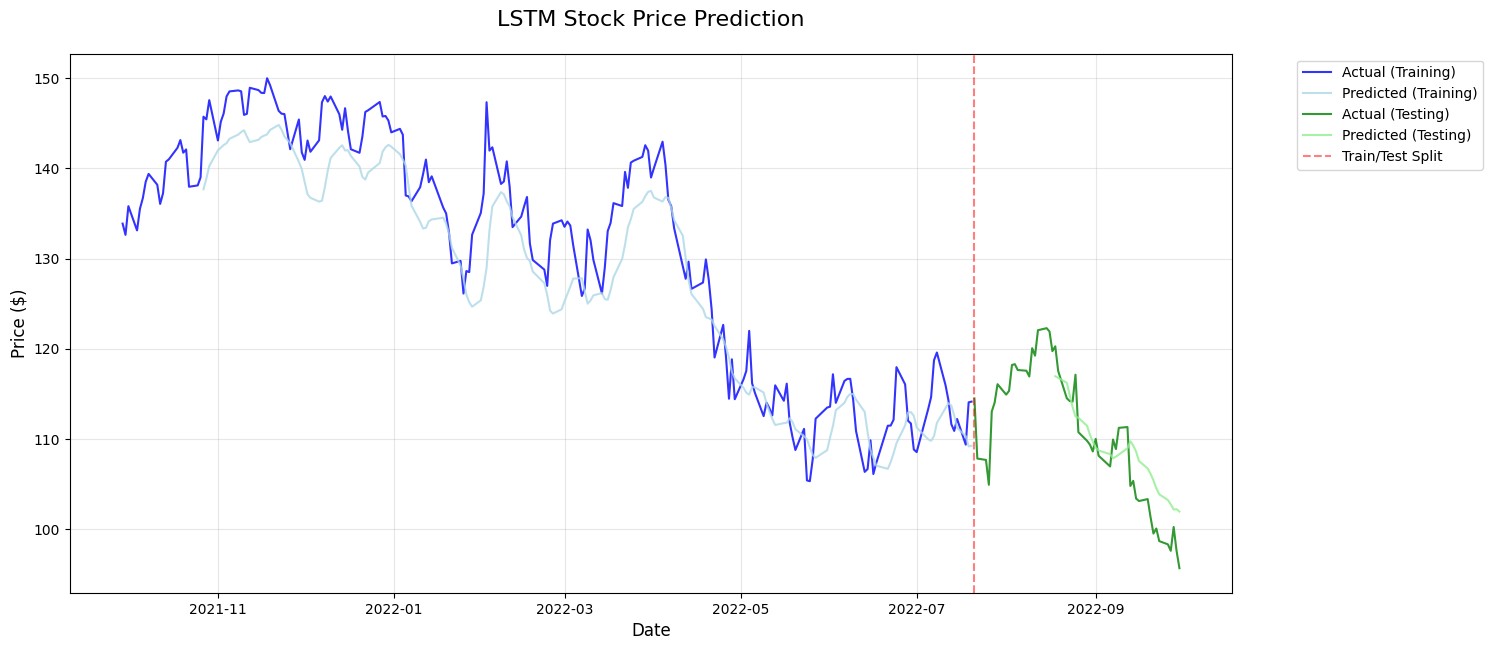


Performance Metrics:
--------------------
Train RMSE: $4.79
Test RMSE: $3.52
Train R-squared: 0.8740
Test R-squared: 0.7079


In [60]:
model = FitModel(Google, learning_rate=0.0001, seq_length=20, prediction_days=1)
history = model.fit(epochs=100, batch_size=5)

train_pred, test_pred = model.predict()
model.plot_results(train_pred, test_pred)

# Sentiment Analysis

## Import Libraries

In [18]:
!pip install ollama



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [28]:
import ollama
import pandas as pd
import json
import re
import matplotlib.pyplot as plt

## Fine-Tuning LLama 2 using Ollama

In [29]:
class OllamaSentimentAnalyzer:
    def __init__(self, model_name="llama2"):
        self.model = model_name
        
    def analyze_tweet(self, tweet):
        prompt = f"""Analyze the sentiment of this stock-related tweet. Provide two outputs:
        1. A sentiment category: POSITIVE, NEGATIVE, or NEUTRAL
        2. A sentiment score between 0.0001 and 1.0000, where:
           - 0.0001 to 0.3333 represents negative sentiment
           - 0.3334 to 0.6666 represents neutral sentiment
           - 0.6667 to 1.0000 represents positive sentiment
        
        Format your response exactly like this:
        SENTIMENT: [category]
        SCORE: [number]

        Tweet: "{tweet}"

        Analysis:"""
        
        try:
            response = ollama.chat(
                model=self.model,
                messages=[{
                    'role': 'user',
                    'content': prompt
                }]
            )
            
            # strip the response message into its different contents needed to add to the dataframe
            response_text = response['message']['content'].strip()
            with open(f'sentiment_analysis_{pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")}.txt', 'a') as f: # write the entire prompt of llama 2 to a txt file
                f.write(f"\nTweet Analysis:\n{response_text}\n{'-'*50}\n")
            sentiment_match = re.search(r'SENTIMENT: (\w+)', response_text)
            score_match = re.search(r'SCORE: (0\.\d{4})', response_text)
            
            # assign the neutral sentiment or 0.5000 score if applicable
            sentiment = sentiment_match.group(1) if sentiment_match else "NEUTRAL"
            score = float(score_match.group(1)) if score_match else 0.5000
            
            return sentiment, score
            
        except Exception as e:
            print(f"Error analyzing tweet: {str(e)}")
            return "NEUTRAL", 0.5000
    
    def analyze_tweets_batch(self, tweets_df, stock_name, tweet_column='Tweet', stock_column='Stock Name'):
        # we need to filter tweets for the specified stock
        stock_tweets = tweets_df[tweets_df[stock_column].str.contains(stock_name, case=False, na=False)]
        
        if stock_tweets.empty:
            print(f"No tweets found for stock: {stock_name}")
            return pd.DataFrame()
        
        # there is only 254 trading days in a year. since our tweets are restricted to 1 year, that means our trading days are only 254.
        # this means that in order to append a tweet correctly to the original datafram without causing errors we must only analyze 254 tweets.
        target_tweets = 254
        if len(stock_tweets) < target_tweets:
            print(f"Warning: Only {len(stock_tweets)} tweets available for {stock_name}, which is less than target {target_tweets}")
            tweets_to_analyze = stock_tweets
        else:
            # take the most recent tweets
            tweets_to_analyze = stock_tweets.tail(target_tweets)
        
        results = []
        total_tweets = len(tweets_to_analyze)
        
        print(f"\nAnalyzing Sentiment for Stock: {stock_name}")
        print(f"Total available tweets for {stock_name}: {len(stock_tweets)}")
        print(f"Analyzing {total_tweets} tweets")
        print("-" * 50)
        
        log_file = f'sentiment_analysis_{pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")}.txt'
        with open(log_file, 'a', encoding='utf-8') as f:
            for idx, row in tweets_to_analyze.iterrows():
                tweet = row[tweet_column]
                try:
                    # Write tweet to file
                    f.write(f"\nTweet:\n{tweet}\n{'-'*50}\n")
                    
                    sentiment, score = self.analyze_tweet(tweet)
                    
                    # Write analysis to file
                    f.write(f"Sentiment: {sentiment}\nScore: {score}\n{'-'*50}\n")
                    
                    results.append({
                        'tweet': tweet,
                        'sentiment': sentiment,
                        'sentiment_score': score,
                        'date': row.get('date', None),
                        'stock': stock_name
                    })
                    
                    if (len(results) % 10 == 0):
                        print(f"Processed {len(results)}/{total_tweets} tweets")
                        
                except Exception as e:
                    print(f"Error processing tweet {idx}: {str(e)}")
                    continue
        
        return pd.DataFrame(results)


## Sentiment Analysis

In [30]:
def process_stock_sentiment(tweets_df, stock_name, model_name="llama2"):
    print(f"\nAnalyzing Twitter Sentiment for {stock_name}")
    print("-" * 50)
    
    # ollama will conduct the sentiment analysis
    analyzer = OllamaSentimentAnalyzer(model_name=model_name)
    
    # analyze each tweet for a given data frame and a given stock from the csv file
    results_df = analyzer.analyze_tweets_batch(tweets_df, stock_name)
    
    if results_df.empty:
        return None, None
    
    sentiment_stats = {
        'positive': (results_df['sentiment'] == 'POSITIVE').mean(),
        'negative': (results_df['sentiment'] == 'NEGATIVE').mean(),
        'neutral': (results_df['sentiment'] == 'NEUTRAL').mean(),
        'average_score': results_df['sentiment_score'].mean(),
        'median_score': results_df['sentiment_score'].median()
    }
    
    # summary of the ollama outputs
    print(f"\nSentiment Analysis Summary for {stock_name}:")
    print("-" * 30)
    print(f"Total Tweets Analyzed: {len(results_df)}")
    print(f"Positive Sentiment: {sentiment_stats['positive']:.2%}")
    print(f"Negative Sentiment: {sentiment_stats['negative']:.2%}")
    print(f"Neutral Sentiment: {sentiment_stats['neutral']:.2%}")
    print(f"Average Score: {sentiment_stats['average_score']:.4f}")
    print(f"Median Score: {sentiment_stats['median_score']:.4f}")
    
    return results_df, sentiment_stats

In [31]:
import time
tweets_df = pd.read_csv('stock_tweets.csv')

# we need a copy of the original Google DataFrame with all technical indicators
Google_with_technicals = Google.copy()

start_time = time.time()

results_df, stats = process_stock_sentiment(tweets_df, 'GOOG')


Analyzing Twitter Sentiment for GOOG
--------------------------------------------------

Analyzing Sentiment for Stock: GOOG
Total available tweets for GOOG: 1291
Analyzing 254 tweets
--------------------------------------------------
Processed 10/254 tweets
Processed 20/254 tweets
Processed 30/254 tweets
Processed 40/254 tweets
Processed 50/254 tweets
Processed 60/254 tweets
Processed 70/254 tweets
Processed 80/254 tweets
Processed 90/254 tweets
Processed 100/254 tweets
Processed 110/254 tweets
Processed 120/254 tweets
Processed 130/254 tweets
Processed 140/254 tweets
Processed 150/254 tweets
Processed 160/254 tweets
Processed 170/254 tweets
Processed 180/254 tweets
Processed 190/254 tweets
Processed 200/254 tweets
Processed 210/254 tweets
Processed 220/254 tweets
Processed 230/254 tweets
Processed 240/254 tweets
Processed 250/254 tweets

Sentiment Analysis Summary for GOOG:
------------------------------
Total Tweets Analyzed: 254
Positive Sentiment: 96.06%
Negative Sentiment: 0.00%

In [61]:
results_df['date'] = pd.to_datetime(results_df['date'])
Google_with_technicals.index = pd.to_datetime(Google_with_technicals.index)

# append sentiment data directly to the copy
Google_with_technicals['sentiment_score'] = results_df['sentiment_score'].values
Google_with_technicals['sentiment'] = results_df['sentiment'].values

elapsed_time = time.time() - start_time
minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60
print(f"Elapsed time: {minutes} minutes and {seconds:.2f} seconds")

print("\nUpdated Google DataFrame shape:", Google_with_technicals.shape)
print(Google_with_technicals.tail())

# assign the appended sentiment analysis to the orignal data frame that was analyzed in the technical analysis
Google = Google_with_technicals

Elapsed time: 33 minutes and 55.28 seconds

Updated Google DataFrame shape: (254, 14)
                                Open        High        Low       Close  \
Date                                                                      
2022-09-26 00:00:00-04:00  98.145138   99.966513  97.916219   98.344193   
2022-09-27 00:00:00-04:00  99.439014   99.986417  96.881122   97.627586   
2022-09-28 00:00:00-04:00  97.557920  100.921991  97.338963  100.265099   
2022-09-29 00:00:00-04:00  98.831889   98.831889  96.064988   97.627586   
2022-09-30 00:00:00-04:00  97.269293   99.024977  95.577302   95.696739   

                             Volume  MA7_Normalized  EMA7_Normalized  \
Date                                                                   
2022-09-26 00:00:00-04:00  22437900        0.977114         0.976880   
2022-09-27 00:00:00-04:00  24225000        0.977646         0.977148   
2022-09-28 00:00:00-04:00  24617000        1.008524         1.002658   
2022-09-29 00:00:00-04:00  2

In [33]:
!mv sentiment_analysis_*.txt output/

## Rebuilding LSTM to Include Sentiment Score Produced by Llama-2

The LSTM model will be the exact same as the technical anlaysis with one simple feature added "sentiment_score"

In [62]:
class LSTMModel:
    def __init__(self, df, learning_rate, seq_length, prediction_days=1):
        self.prediction_days = prediction_days
        self.df = df
        self.seq_length = seq_length
        self.learning_rate = learning_rate
        
        # these features will be used to train the model - with out added feature "sentiment_score" we hope to see if twitter sentiment
        # can affect how our model performs
        self.features = ['Close', 'Volume', 
                        'MA7_Normalized', 'EMA7_Normalized', 
                        'MA20_Normalized', 'EMA20_Normalized',
                        'RSI', 'BB%', 'Fib_Retracement', 'sentiment_score']
        self.data = df[self.features].values
        
        # some features are on different value scales so we must normalize them to values [0,1]
        self.scaler = MinMaxScaler()
        self.data_scaled = self.scaler.fit_transform(self.data)
        
        self.close_scaler = MinMaxScaler()
        self.close_scaler.fit_transform(df[['Close']].values)
        
        # our train/test split will be 80/20
        self.train_size = int(0.8 * len(self.data_scaled))
        self.train_data = self.data_scaled[:self.train_size]
        self.test_data = self.data_scaled[self.train_size:]
        
        # now we need our X_train and Y_train and X_Test and Y_test sets using the create_sequences function
        self.X_train, self.y_train = self.create_sequences(self.train_data)
        self.X_test, self.y_test = self.create_sequences(self.test_data)
        
        # Build and compile model
        self.model = self.build_model()


    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.seq_length - self.prediction_days + 1):
            X.append(data[i:(i + self.seq_length)]) # X is going to be the input sequences (past data)
            y.append(data[i + self.seq_length:i + self.seq_length + self.prediction_days, 0]) # y is going to be the target sequences (future data to predict)
        return np.array(X), np.array(y)
    
    # simple LSTM model for handling time-series data
    def build_model(self):
        model = Sequential([
            LSTM(128, input_shape=(self.seq_length, len(self.features)), return_sequences=True),
            Dropout(0.2),
            LSTM(64, return_sequences=False),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(self.prediction_days)
        ])
        
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mse', metrics=['mae'])
        return model

In [63]:
class FitModel:
    def __init__(self, df, seq_length, prediction_days, learning_rate):
        self.df = df
        self.seq_length = seq_length
        self.prediction_days = prediction_days
        self.lstm_model = LSTMModel(df,  learning_rate=learning_rate, seq_length=seq_length, prediction_days=prediction_days)
    
    def fit(self, epochs, batch_size, validation_split=0.1):
        
        history = self.lstm_model.model.fit(
            self.lstm_model.X_train, 
            self.lstm_model.y_train,
            epochs=epochs, 
            batch_size=batch_size,
            validation_split=validation_split,
            shuffle=False
        )
        return history
    
    def predict(self):
        train_predict = self.lstm_model.model.predict(self.lstm_model.X_train)
        test_predict = self.lstm_model.model.predict(self.lstm_model.X_test)
        
        # AI Disclosure - These two variables were created with the help of ChatGPT. I kept getting shape or dimension errors and this helped fix 
        # those problems.
        train_predict = self.lstm_model.close_scaler.inverse_transform(
            np.hstack([train_predict, np.zeros((len(train_predict), len(self.lstm_model.features)-1))])
        )[:, 0]
        test_predict = self.lstm_model.close_scaler.inverse_transform(
            np.hstack([test_predict, np.zeros((len(test_predict), len(self.lstm_model.features)-1))])
        )[:, 0]
        
        return train_predict, test_predict
    
    def plot_results(self, train_predict, test_predict):
        results_df = self.df[['Close']].copy()
        results_df.loc[:,'Predicted'] = np.nan # initialize the predicted price to NA
        
        train_index = self.df.index[self.seq_length:self.lstm_model.train_size]
        test_index = self.df.index[self.lstm_model.train_size+self.seq_length:]
        
        # in time series data from YFinance the index is not included as a feature in the original dataframe
        # this code handles matching up Predicted date with actual date for visualization purposes.
        for i, idx in enumerate(train_index):
            results_df.loc[idx:idx + pd.Timedelta(days=self.prediction_days-1), 'Predicted'] = train_predict[i]
        
        for i, idx in enumerate(test_index):
            results_df.loc[idx:idx + pd.Timedelta(days=self.prediction_days-1), 'Predicted'] = test_predict[i]
        
        plt.figure(figsize=(15,7))
        
        # lets first plot the training data where the actual price is blue and the predicted price is lightblue 
        train_data = results_df.iloc[:self.lstm_model.train_size]
        plt.plot(train_data.index, train_data['Close'], 
                label='Actual (Training)', 
                color='blue', 
                alpha=0.8)
        plt.plot(train_data.index, train_data['Predicted'], 
                label='Predicted (Training)', 
                color='lightblue', 
                alpha=0.8)
        
        # now lets plot the test data where the actual price is green and the predicted price is lightgreen
        test_data = results_df.iloc[self.lstm_model.train_size:]
        plt.plot(test_data.index, test_data['Close'], 
                label='Actual (Testing)', 
                color='green', 
                alpha=0.8)
        plt.plot(test_data.index, test_data['Predicted'], 
                label='Predicted (Testing)', 
                color='lightgreen', 
                alpha=0.8)
        
        # visualize where the train/test split occured
        split_date = self.df.index[self.lstm_model.train_size]
        plt.axvline(x=split_date, color='red', linestyle='--', alpha=0.5, label='Train/Test Split')
        
        
        plt.title('LSTM Stock Price Prediction', fontsize=16, pad=20)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price ($)', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # print our root mean squared error for train and test respectively in terms of $
        train_rmse = np.sqrt(np.mean((train_predict - 
                                    self.df['Close'].values[self.seq_length:self.lstm_model.train_size])**2))
        test_rmse = np.sqrt(np.mean((test_predict - 
                                   self.df['Close'].values[self.lstm_model.train_size+self.seq_length:])**2))
        
        print('\nPerformance Metrics:')
        print('-' * 20)
        print(f'Train RMSE: ${train_rmse:.2f}')
        print(f'Test RMSE: ${test_rmse:.2f}')
        
        # print our r squared (accuracy) for train and test respectively
        train_r2 = 1 - np.sum((self.df['Close'].values[self.seq_length:self.lstm_model.train_size] - train_predict)**2) / \
                   np.sum((self.df['Close'].values[self.seq_length:self.lstm_model.train_size] - 
                          np.mean(self.df['Close'].values[self.seq_length:self.lstm_model.train_size]))**2)
        
        test_r2 = 1 - np.sum((self.df['Close'].values[self.lstm_model.train_size+self.seq_length:] - test_predict)**2) / \
                  np.sum((self.df['Close'].values[self.lstm_model.train_size+self.seq_length:] - 
                         np.mean(self.df['Close'].values[self.lstm_model.train_size+self.seq_length:]))**2)
        
        print(f'Train R-squared: {train_r2:.4f}')
        print(f'Test R-squared: {test_r2:.4f}')

## Hyper Parameter Optimization

In [36]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

param_grid = {
    'epochs': [20, 50, 100],
    'batch_size': [5, 10, 25],
    'learning_rate': [0.01, 0.05, 0.0001],
    'seq_length': [5, 10, 20]
}

grid_search_results = perform_grid_search(Google, param_grid)

Starting grid search with 81 combinations...

Trying combination 1/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.01, 'seq_length': 5}
Test Loss: 0.0566, Test MAE: 0.2141
New best parameters found!

Trying combination 2/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.01, 'seq_length': 10}
Test Loss: 0.0245, Test MAE: 0.1344
New best parameters found!

Trying combination 3/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.01, 'seq_length': 20}
Test Loss: 0.0594, Test MAE: 0.2177

Trying combination 4/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.05, 'seq_length': 5}
Test Loss: 0.0656, Test MAE: 0.2375

Trying combination 5/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.05, 'seq_length': 10}
Test Loss: 0.1434, Test MAE: 0.3712

Trying combination 6/81
Parameters: {'epochs': 20, 'batch_size': 5, 'learning_rate': 0.05, 'seq_length': 20}
Test Loss: 0.3033, Test MAE: 0.5375

Trying combination 7/81
Pa

In [38]:
print(grid_search_results['best_params'])

{'epochs': 100, 'batch_size': 5, 'learning_rate': 0.0001, 'seq_length': 20}


## Running the Sentiment Analysis Model

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8559 - mae: 0.8876 - val_loss: 0.0136 - val_mae: 0.1003
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2967 - mae: 0.5011 - val_loss: 0.0929 - val_mae: 0.2977
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mae: 0.1767 - val_loss: 0.0599 - val_mae: 0.2356
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0605 - mae: 0.2143 - val_loss: 0.0614 - val_mae: 0.2383
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mae: 0.1890 - val_loss: 0.0601 - val_mae: 0.2352
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0399 - mae: 0.1635 - val_loss: 0.0346 - val_mae: 0.1727
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0377 - mae: 0.1665 - val_loss: 0.0229 - val_mae: 0.1342
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mae: 0.1879 - val_loss: 0.0354 - val_mae: 0.1736
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.02

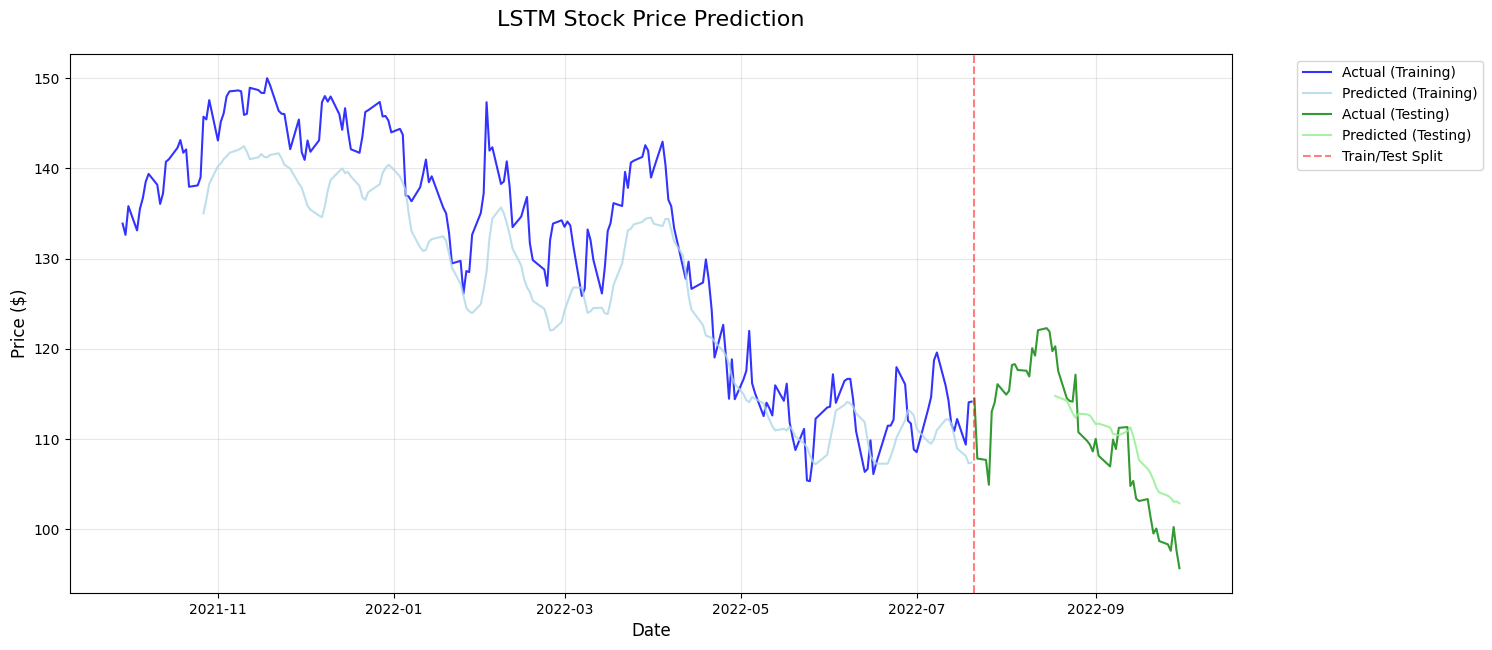


Performance Metrics:
--------------------
Train RMSE: $5.99
Test RMSE: $4.13
Train R-squared: 0.8032
Test R-squared: 0.5982


In [64]:
model = FitModel(Google, learning_rate=0.0001, seq_length=20, prediction_days=1)
history = model.fit(epochs=100, batch_size=5)

train_pred, test_pred = model.predict()
model.plot_results(train_pred, test_pred)